In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from benchmark_costs_script import Benchmark

In [2]:
data = pd.read_csv("..\data\AAPL_Quotes_Data.csv")
data = data.iloc[-390 * 8:, :].reset_index().drop("index", axis = 1)
benchmark = Benchmark(data)

#### Analysis of TWAP and VWAP on test data

In [3]:
performance_df = pd.DataFrame(columns=["test_date", "elapsed_time", "strategy", "slippage", "market_impact"])
for i in range(8):
    vwap_trades = benchmark.get_vwap_trades(i, 1000)
    vwap_slippage, vwap_market_impact = benchmark.simulate_strategy(vwap_trades, i)
    twap_trades = benchmark.get_twap_trades(i, 1000)
    twap_slippage, twap_market_impact = benchmark.simulate_strategy(twap_trades, i)
    added_df = pd.DataFrame({
        "test_date": [i] * 780,
        "elapsed_time": [j for j in range(390)] * 2,
        "strategy": ["vwap"] * 390 + ["twap"] * 390,
        "slippage": vwap_slippage + twap_slippage,
        "market_impact": vwap_market_impact + twap_market_impact
     })
    performance_df = pd.concat([performance_df, added_df]).reset_index().drop("index", axis = 1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9012\3551307040.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, added_df]).reset_index().drop("index", axis = 1)


In [4]:
performance_df.head()

,test_date,elapsed_time,strategy,slippage,market_impact
0,0,0,vwap,0.000000e+00,0.000007
1,0,1,vwap,7.274432e-14,0.000007
2,0,2,vwap,0.000000e+00,0.000007
3,0,3,vwap,0.000000e+00,0.000007
4,0,4,vwap,0.000000e+00,0.000007


In [5]:
performance_df.groupby(["test_date", "strategy"]).agg({"slippage": ["mean", "std"], "market_impact": ["mean", "std"]})

slippage               market_impact          
                            mean           std          mean       std
test_date strategy                                                    
0         twap      7.474480e-16  2.088850e-14      0.000006  0.000002
          vwap      7.480321e-16  2.085321e-14      0.000006  0.000002
1         twap      6.261545e-05  1.236556e-03      0.000006  0.000002
          vwap      6.275834e-05  1.239378e-03      0.000006  0.000002
2         twap      6.515391e-05  1.286687e-03      0.000006  0.000002
          vwap      6.484730e-05  1.280632e-03      0.000006  0.000002
3         twap     -3.737240e-16  2.714979e-14      0.000006  0.000002
          vwap     -3.716928e-16  2.707741e-14      0.000006  0.000002
4         twap      1.494896e-15  2.660272e-14      0.000006  0.000002
          vwap      1.491243e-15  2.654082e-14      0.000006  0.000002
5         twap      2.191541e-05  4.327946e-04      0.000006  0.000002
          vwap      2.201531e-05  4.347675e-04      0.000006  0.000002
6         twap      6.544873e-05  1.292509e-03      0.000006  0.000002
          vwap      6.488906e-05  1.281456e-03      0.000006  0.000002
7         twap      6.445708e-05  1.272925e-03      0.000006  0.000002
          vwap      6.447388e-05  1.273257e-03      0.000006  0.000002

#### Analyze the transaction cost analysis for the default case + optimized case

In [6]:
default_dqn_trades_all = pd.read_csv("..\data\market_var_dqn_trades.csv")
for i in range(8):
    default_dqn_trades = default_dqn_trades_all.loc[390*i:390*(i + 1)-1, :].reset_index().drop("index", axis = 1)
    default_dqn_slippage, default_dqn_market_impact = benchmark.simulate_strategy(default_dqn_trades, i)
    added_df = pd.DataFrame({
       "test_date": [i] * 390,
        "elapsed_time": [j for j in range(390)],
        "strategy": ["default_dqn"] * 390,
        "slippage": default_dqn_slippage,
        "market_impact": default_dqn_market_impact
    })
    performance_df = pd.concat([performance_df, added_df]).reset_index().drop("index", axis = 1)

In [7]:
performance_df.groupby(["test_date", "strategy"]).agg({"slippage": ["mean", "std"], "market_impact": ["mean", "std"]})

slippage               market_impact          
                               mean           std          mean       std
test_date strategy                                                       
0         default_dqn  1.429172e-03  2.822388e-02  4.840435e-07  0.000007
          twap         7.474480e-16  2.088850e-14  6.081397e-06  0.000002
          vwap         7.480321e-16  2.085321e-14  6.074771e-06  0.000002
1         default_dqn  0.000000e+00  1.222761e-14  6.925814e-07  0.000007
          twap         6.261545e-05  1.236556e-03  6.081397e-06  0.000002
          vwap         6.275834e-05  1.239378e-03  6.076415e-06  0.000002
2         default_dqn -4.372571e-16  8.635135e-15  6.925814e-07  0.000007
          twap         6.515391e-05  1.286687e-03  6.081397e-06  0.000002
          vwap         6.484730e-05  1.280632e-03  6.072555e-06  0.000002
3         default_dqn -8.745141e-16  1.727027e-14  6.925814e-07  0.000007
          twap        -3.737240e-16  2.714979e-14  6.081397e-06  0.000002
          vwap        -3.716928e-16  2.707741e-14  6.071786e-06  0.000002
4         default_dqn  1.010875e-02  1.996319e-01  6.925814e-07  0.000007
          twap         1.494896e-15  2.660272e-14  6.081397e-06  0.000002
          vwap         1.491243e-15  2.654082e-14  6.073372e-06  0.000002
5         default_dqn -1.311771e-15  1.491799e-14  6.925814e-07  0.000007
          twap         2.191541e-05  4.327946e-04  6.081397e-06  0.000002
          vwap         2.201531e-05  4.347675e-04  6.073806e-06  0.000002
6         default_dqn  0.000000e+00  0.000000e+00  6.925814e-07  0.000007
          twap         6.544873e-05  1.292509e-03  6.081397e-06  0.000002
          vwap         6.488906e-05  1.281456e-03  6.076615e-06  0.000002
7         default_dqn  4.372571e-16  8.635135e-15  6.925814e-07  0.000007
          twap         6.445708e-05  1.272925e-03  6.081397e-06  0.000002
          vwap         6.447388e-05  1.273257e-03  6.080972e-06  0.000002

In [8]:
performance_df_summarize = performance_df.groupby(["test_date", "strategy"]).agg({"slippage": ["mean", "std"], "market_impact": ["mean", "std"]}).reset_index()
performance_df_summarize.columns = ['_'.join(col).strip() for col in performance_df_summarize.columns.values]
performance_df_summarize.head()

,test_date_,strategy_,slippage_mean,slippage_std,market_impact_mean,market_impact_std
0,0,default_dqn,1.429172e-03,2.822388e-02,4.840435e-07,0.000007
1,0,twap,7.474480e-16,2.088850e-14,6.081397e-06,0.000002
2,0,vwap,7.480321e-16,2.085321e-14,6.074771e-06,0.000002
3,1,default_dqn,0.000000e+00,1.222761e-14,6.925814e-07,0.000007
4,1,twap,6.261545e-05,1.236556e-03,6.081397e-06,0.000002


<Axes: xlabel='test_date_', ylabel='slippage_mean'>

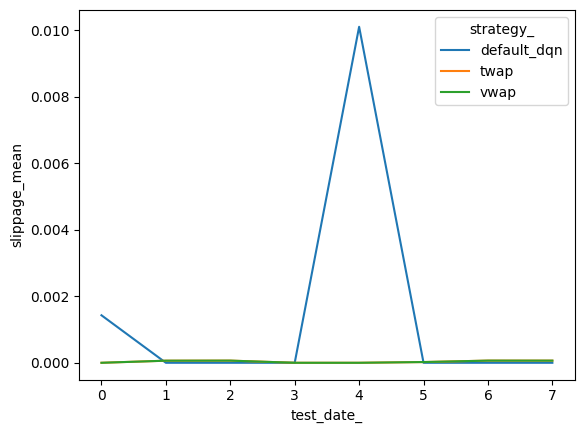

In [9]:
sns.lineplot(data = performance_df_summarize, x = "test_date_", y = "slippage_mean", hue = "strategy_")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9012\2762446152.py:1: RuntimeWarning: divide by zero encountered in log
  performance_df_summarize["log_slippage_mean"] = performance_df_summarize["slippage_mean"].apply(lambda x: np.log(x))
C:\Users\Admin\AppData\Local\Temp\ipykernel_9012\2762446152.py:1: RuntimeWarning: invalid value encountered in log
  performance_df_summarize["log_slippage_mean"] = performance_df_summarize["slippage_mean"].apply(lambda x: np.log(x))


<Axes: xlabel='test_date_', ylabel='log_slippage_mean'>

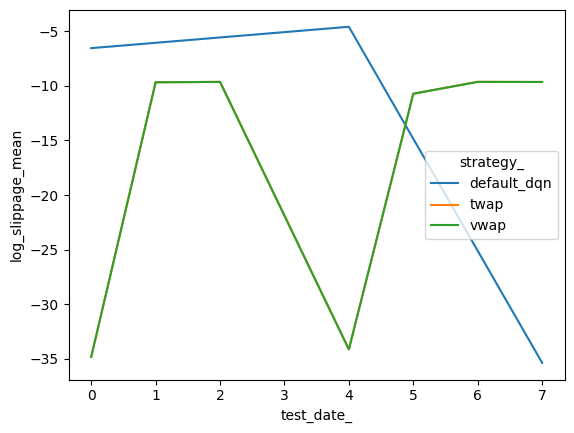

In [10]:
performance_df_summarize["log_slippage_mean"] = performance_df_summarize["slippage_mean"].apply(lambda x: np.log(x))
sns.lineplot(data = performance_df_summarize, x = "test_date_", y = "log_slippage_mean", hue = "strategy_")

<Axes: xlabel='test_date_', ylabel='market_impact_mean'>

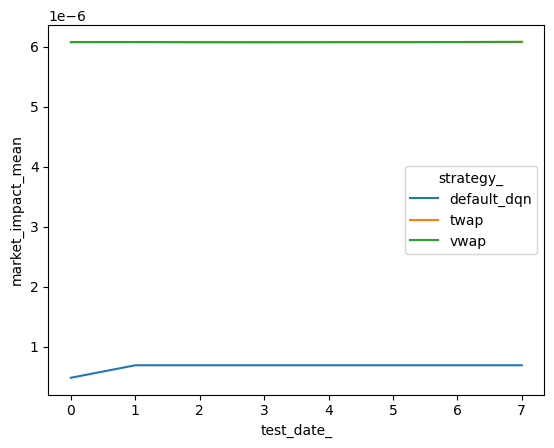

In [11]:
sns.lineplot(data = performance_df_summarize, x = "test_date_", y = "market_impact_mean", hue = "strategy_")

<Axes: xlabel='test_date_', ylabel='log_market_impact_mean'>

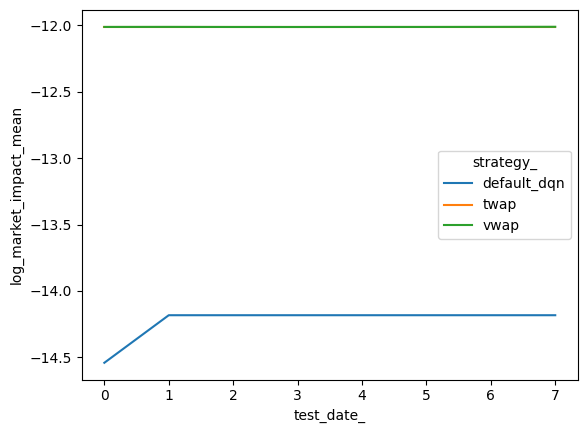

In [12]:
performance_df_summarize["log_market_impact_mean"] = performance_df_summarize["market_impact_mean"].apply(lambda x: np.log(x))
sns.lineplot(data = performance_df_summarize, x = "test_date_", y = "log_market_impact_mean", hue = "strategy_")